<a href="https://colab.research.google.com/github/boriskuchin/AI-MFTI/blob/main/06_knn_data_proc_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 6. kNN. Базовая предобработка данных. Метрики качества задачи классификации.

# Базовая предобработка данных

## Данные

Сегодня будем работать с данными о населении США и их достатке. А точнее будем учиться предсказывать получает ли человек больше 50к долларов в год или нет.

- Описание датасета: https://archive.ics.uci.edu/ml/datasets/Adult
- Ссылка на скачивание: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

Для начала скачаем исходные данные в виде файла:

In [ ]:
!wget -O data.csv https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2024-06-04 16:10:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.csv’

data.csv                [ <=>                ]   3.79M  --.-KB/s    in 0.09s   

2024-06-04 16:11:00 (41.8 MB/s) - ‘data.csv’ saved [3974305]



А теперь считаем данные:

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data.csv', sep=',')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
!head -n 1 data.csv

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K


Пара полезных моментов:
Часто используемые параметры функции, на которые стоит обратить внимание:

- `sep` - сепаратор, по умолчанию автоматически определяется pandas-ом, но могут возникнуть затруднения (например, если стоит табуляция, тогда следует указать - `\t`)
- `header` - список названий колонок, по умолчанию берется первая строка в csv-файле.
    
    Можно указать `None`, если названий нет и потом задать колонки вручную:
    
    `df.columns = ['col1 name', 'col2 name', ...]`
- Полезный параметр - `skip_blank_lines`, пропустить пустые линии.
    
    Часто бывает, что заполняют не с первой строки в файле. Кроме этого можно указать число, которую строку воспринимать названием колонки (часто бывает, что в шапке документа стоит различная побочная информация, не имеющая отношения к сути); отсчет с 0, по умолчанию 0.
- `index_col` - какую колонку использовать в качестве индексов, если это даты, то стоит обратить внимание на параметр `parse_dates`.
- `parse_dates` - позволяет использовать в качестве индекса даты (`pandas.Datetime`), позволяет делать удобную навигацию по документу и корректное отображение дат. Если `True` - `pandas` автоматически попробует сконвертировать колонку индексов в формат даты (можно указать свой `date_parser` - конвертацию в нужный формат даты). Можно передать `[1, 2, 3]` - проанализирует колонки 1, 2, 3 как отдельные колонки даты. Альтернативно можно указать колонки, которые можно объединить и пропарсить как одну колонку дат, например `[[1, 3]]`.
- `encoding` - указать формат кодировки данных. По умолчанию документы используют формат `utf-8`. Если содержимое отобразилось некорректно, чаще всего встречаются `latin` или `window-1251`.
- Первый аргумент (позиционный), можно указать явно `filepath_or_bufferstr`.

    Принимает не только путь (`str`) к файлу на Вашей ОС, но и ссылку на внешний, скачиваемый в интернете файл, как в примере в интернете. На практике можно указать на любую валидную схему (не только `http://...`), например указывающюю на ваше внешнее сетевое хранилище или облачный сервис, например ftp, s3, github.

- Хотя `.csv` один из самых распространенных сценариев загрузки данных `pandas` поддерживает множество других источников, например sql-базы данных, экосистему `hadoop`, `pickle`, `excel`, `json`, `html`, `sas`.

In [ ]:
df = pd.read_csv('data.csv', sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Первое знакомство

Посмотрим сколько строк в нашем df:

In [ ]:
len(df)

32561

Очистим датасет от дублирующихся значений:

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
len(df)

32537

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Многие имена колонок некорректно заполнены, исправим:

In [ ]:
# Назначаем имена колонок от поставщика данных
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')

df.columns = columns.split()  # этот метод разделит датасет по колонкам как в массиве columns

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Посмотрим на отдельные части данных - на колонку `workclass`:

In [ ]:
df['workclass'].value_counts()

workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

Странная графа `?`, посмотрим на эти записи:

In [ ]:
df[df['workclass'] == ' ?']

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Значит `?` - аналог `NaN`! Посмотрим, много ли таких данных - в этот раз с помощью визуализации:

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure

<Axes: >

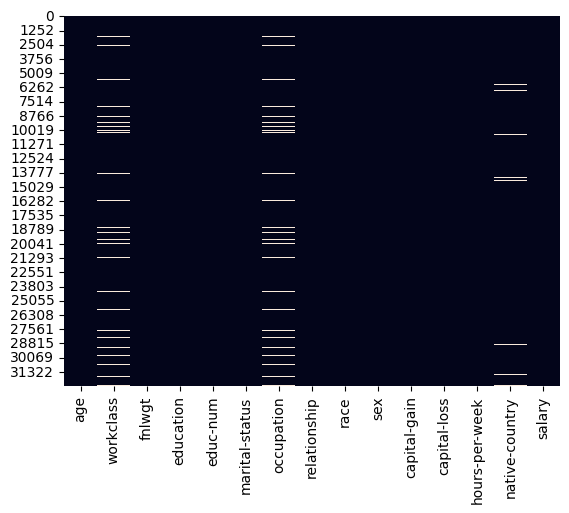

In [ ]:
sns.heatmap(df == ' ?', cbar=False)

Видим в 3х колонках имеются пропуски...

## Исследование данных

Основные пункты, которые надо исследовать в ходе обработки данных:

1. Вычисление основных (описательных) статистик
2. Исследование распределений данных
3. Исследование на пропуски
4. Корректность заполнения данных с точки зрения здравого смысла (например, нету ли возраста > 150 лет)
5. Исследование на дубликаты
6. Кодировка данных





### Статистики

Функция `describe` отобразит основные статистики по каждому числовому столбцу. По этим показателям можно понять корректность данных, их разброс.

In [ ]:
df.describe()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


В ML пропуски - боль, их не должно быть в данных (в большинстве методов), но при этом если они есть в данных, они должны быть NaN-ами - на это значение заточено большинство реализаций моделей.

Как обрабатывать пропущенные значения? Зависит от ситуации:
- удалить колонку - если ОЧЕНЬ много пропусков в колонке
- удалить строку - если для отдельных объектов много признаков отсутствуют
- заменить на 0 - может "сместить" наши данные
- заменить некоторым значением - средним, медианой, предыдущим известным, интерполированным, ....

Чаще всего для поиска NaN-ов используют метод `info`:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   educ-num        32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Можем менять типы с помощью `astype`:

In [ ]:
df['age'].astype(np.int32)

0        50
1        38
2        53
3        28
4        37
         ..
32555    27
32556    40
32557    58
32558    22
32559    52
Name: age, Length: 32536, dtype: int32

In [ ]:
df['age'] = df['age'].astype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int32 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   educ-num        32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int32(1), int64(5), object(9)
memory usage: 3.8+ MB


Иногда полезно исследовать не весь датасет сразу, а остановиться подробнее на отдельных признаках. Например, посмотрим внимательнее на колонку `salary`:

Иногда целесообразно исследовать конкретный признак. Например, в описываемом датафрейме есть признак salary (зарплата) выше определенного порога. Для задач классификации часто бывает нужно понять, каким количеством примеров представлен класс, это может повлиять на создание алгоритмов, например, если значений одного класса слишком мало (задачи несбалансированных данных).

In [ ]:
# обращаясь к колонке мы работаем с series, например хотим узнать элементы (уникальные названия) и их количество
df['salary'].value_counts()

salary
 <=50K    24698
 >50K      7839
Name: count, dtype: int64

Это наше целевое значение (класс), и видим, что присутствует несбалансированность - значений `<=50K` в 3 раза больше, чем `>50K`. Это нежелательное состояние данных!

Теперь посмотрим на `hours-per-week`, для этого можно отсортировать по убыванию:

In [ ]:
df.sort_values(by='hours-per-week', ascending=False).head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
31699,43,Self-emp-not-inc,163108,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
27809,30,Private,39386,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,99,United-States,<=50K
23398,66,Private,28367,Bachelors,13,Married-civ-spouse,Priv-house-serv,Other-relative,White,Male,0,0,99,United-States,<=50K
5376,43,Private,86750,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,<=50K
25986,44,Local-gov,212665,Some-college,10,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,0,99,United-States,<=50K


Посмотрим на максимальные значения в каждом столбце - поможет `apply`:

In [ ]:
import numpy as np

In [ ]:
df.apply(np.max)

age                              90
workclass               Without-pay
fnlwgt                      1484705
education              Some-college
educ-num                         16
marital-status              Widowed
occupation         Transport-moving
relationship                   Wife
race                          White
sex                            Male
capital-gain                  99999
capital-loss                   4356
hours-per-week                   99
native-country           Yugoslavia
salary                         >50K
dtype: object

Заменим значения нашей целевой колонки - с ` <=50K` и ` >50K` на `0` и `1`, модели работают с числами, а не строками. В этом нам поможет `map`:

Например, метод map можно использовать для замены значений в колонке, передав ему в качестве аргумента словарь вида {old_value: new_value}:

In [ ]:
mapping = {' <=50K' : 0, ' >50K' : 1}

df['salary'] = df['salary'].map(mapping)
df.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [ ]:
df['salary'].value_counts()

salary
0    24698
1     7839
Name: count, dtype: int64

### Группировка данных


В общем случае группировка данных в Pandas выглядит следующим образом:
```
df.groupby(by=grouping_columns)[columns_to_show].function()
```

* К датафрейму применяется метод `groupby`, который разделяет данные по `grouping_columns` – признаку или набору признаков.
* Выбираем нужные нам столбцы (`columns_to_show`).
* К полученным группам применяется функция или несколько функций.



Сгруппируем данных по признаку `salary` и выводем статистики по трём столбцам в каждой группе:

In [ ]:
columns_to_show = ['age', 'educ-num', 'hours-per-week']

df.groupby(['salary'])[columns_to_show].describe(percentiles=[])

age                                         educ-num             \
          count       mean        std   min   50%   max    count       mean   
salary                                                                        
0       24698.0  36.787392  14.017335  17.0  34.0  90.0  24698.0   9.596081   
1        7839.0  44.250925  10.520102  19.0  44.0  90.0   7839.0  11.612195   

                                  hours-per-week                             \
             std  min   50%   max          count       mean        std  min   
salary                                                                        
0       2.434654  1.0   9.0  16.0        24698.0  38.842862  12.318286  1.0   
1       2.385181  2.0  12.0  16.0         7839.0  45.473402  11.014165  1.0   

                    
         50%   max  
salary              
0       40.0  99.0  
1       40.0  99.0

Сделаем то же самое, но немного по другому, передав в `agg` список функций:

In [ ]:
columns_to_show = ['age', 'educ-num', 'hours-per-week']

df.groupby(['salary'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

age                      educ-num                    \
             mean        std min max       mean       std min max   
salary                                                              
0       36.787392  14.017335  17  90   9.596081  2.434654   1  16   
1       44.250925  10.520102  19  90  11.612195  2.385181   2  16   

       hours-per-week                     
                 mean        std min max  
salary                                    
0           38.842862  12.318286   1  99  
1           45.473402  11.014165   1  99

### Сводные таблицы

Допустим, мы хотим посмотреть, как наблюдения в нашей выборке распределены в контексте двух признаков — `salary` и `education`. Для этого мы можем построить таблицу сопряженности, воспользовавшись методом `crosstab`:

In [ ]:
pd.crosstab(df['salary'], df['education'])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
salary,,,,,,,,,,,,,,,,
0,871,1115,400,160,316,605,487,802,1021,3131,107,8820,763,50,153,5896
1,62,60,33,6,16,40,27,265,361,2221,306,1674,959,0,423,1386


Давайте посмотрим среднее число рабочих часов, классов образования для разных направлений работы - здесь уже не обойтись без `pivot_table`:

In [ ]:
df.pivot_table(['hours-per-week', 'educ-num'], ['workclass'], aggfunc='mean').head(10)

,educ-num,hours-per-week
workclass,,
?,9.260349,31.919390
Federal-gov,10.973958,41.379167
Local-gov,11.042045,40.982800
Never-worked,7.428571,28.428571
Private,9.881136,40.271027
Self-emp-inc,11.137097,48.818100
Self-emp-not-inc,10.226378,44.423622
State-gov,11.374711,39.030840
Without-pay,9.071429,32.714286


## Первые попытки прогнозирования

Посмотрим, как зарплата связана с признаком образования (`education`). Сделаем это с помощью сводной таблички `crosstab`.

In [ ]:
pd.crosstab(df['salary'], df['education'], margins=True)

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
salary,,,,,,,,,,,,,,,,,
0,871,1115,400,160,316,605,487,802,1021,3132,107,8820,763,50,153,5896,24698
1,62,60,33,6,16,40,27,265,361,2221,306,1674,959,0,423,1386,7839
All,933,1175,433,166,332,645,514,1067,1382,5353,413,10494,1722,50,576,7282,32537


Видим, что чем выше образование - тем больше в пропорции "1". Это и логично, доктора наук, вероятнее будут получать более, чем люди, у которых только 9 классов образования.

## Перекодировка категориальных признаков

Алгоритмы не могут работать с текстовыми данными без предварительной конвертации в числовой формат.

Работа с категориальными признаками может быть устроена по разному.

В этой задаче предлагается заменить все уникальные значения таких признаков некоторым числовым значением.

In [ ]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # object -- общий тип / если тип столбца - общий (не число), то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки
encoded_data.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


Посмотрим, во что переведены категориальные признаки:

In [ ]:
df.groupby('race').count()[['age']]

,age
race,
Amer-Indian-Eskimo,311
Asian-Pac-Islander,1038
Black,3122
Other,271
White,27795


In [ ]:
encoded_data.groupby('race').count()[['age']]

,age
race,
0,311
1,1038
2,3122
3,271
4,27795


In [ ]:
encoders['race'].transform([' White'])

array([4])

In [ ]:
df.groupby('workclass').count()[['age']]

,age
workclass,
?,1836
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,22673
Self-emp-inc,1116
Self-emp-not-inc,2540
State-gov,1298
Without-pay,14


In [ ]:
encoded_data.groupby('workclass').count()[['age']]

,age
workclass,
0,1836
1,960
2,2093
3,7
4,22673
5,1116
6,2540
7,1298
8,14


# Визуализация

## `matplotlib`

самый простой и зачастую удобный способ визуализировать данные из `pandas.DataFrame` — это воспользоваться методом `plot`.

### `.plot`

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

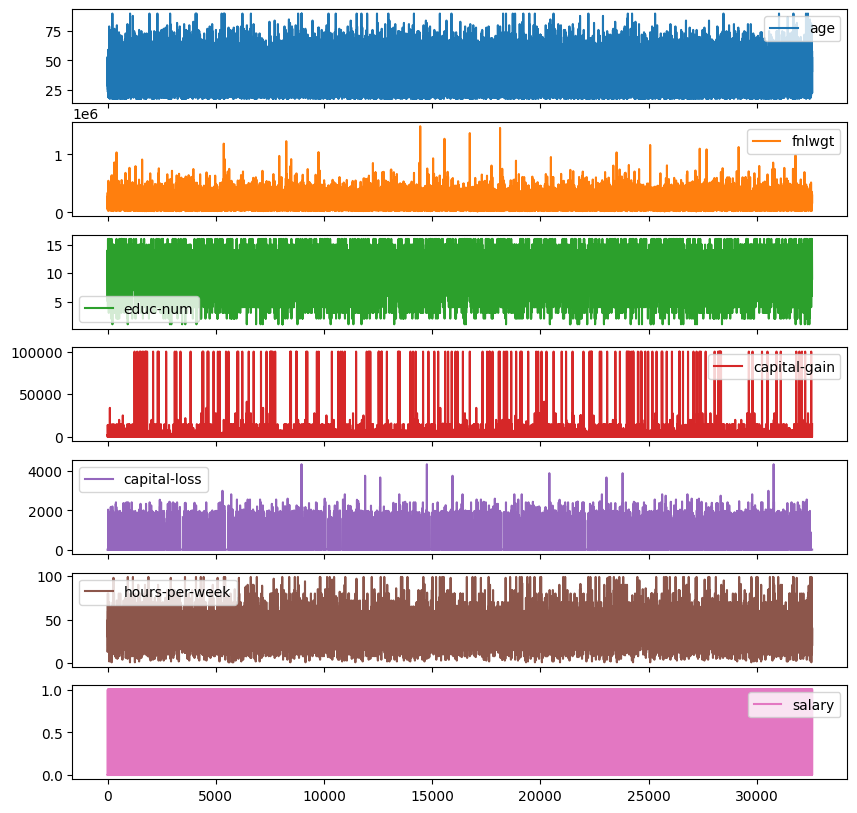

In [ ]:
# subplots нужен для расположения всех данных на разных графиках
df.plot(subplots=True, figsize = (10, 10))

### Столбцами

C помощью параметра `kind` можно изменить тип графика, например, на `bar chart`.

Matplotlib позволяет очень гибко настраивать графики. На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры. Например, параметр `rot` отвечает за угол наклона подписей к оси x.

<Axes: xlabel='salary'>

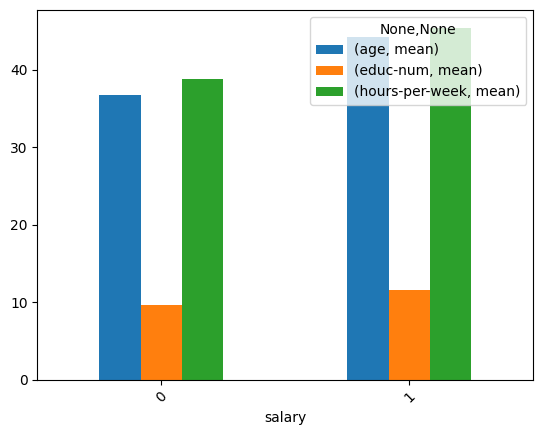

In [ ]:
columns_to_show = ['age', 'educ-num', 'hours-per-week']

df.groupby(['salary'])[columns_to_show].agg([np.mean]).plot(kind='bar', rot=45)

### Гистограммы значений

Построим графики гистограмм зависимости различных признаков для того, чтоб оценить корректность данных:

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education'}>],
       [<Axes: title={'center': 'educ-num'}>,
        <Axes: title={'center': 'marital-status'}>,
        <Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>],
       [<Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'native-country'}>,
        <Axes: title={'center': 'salary'}>, <Axes: >]], dtype=object)

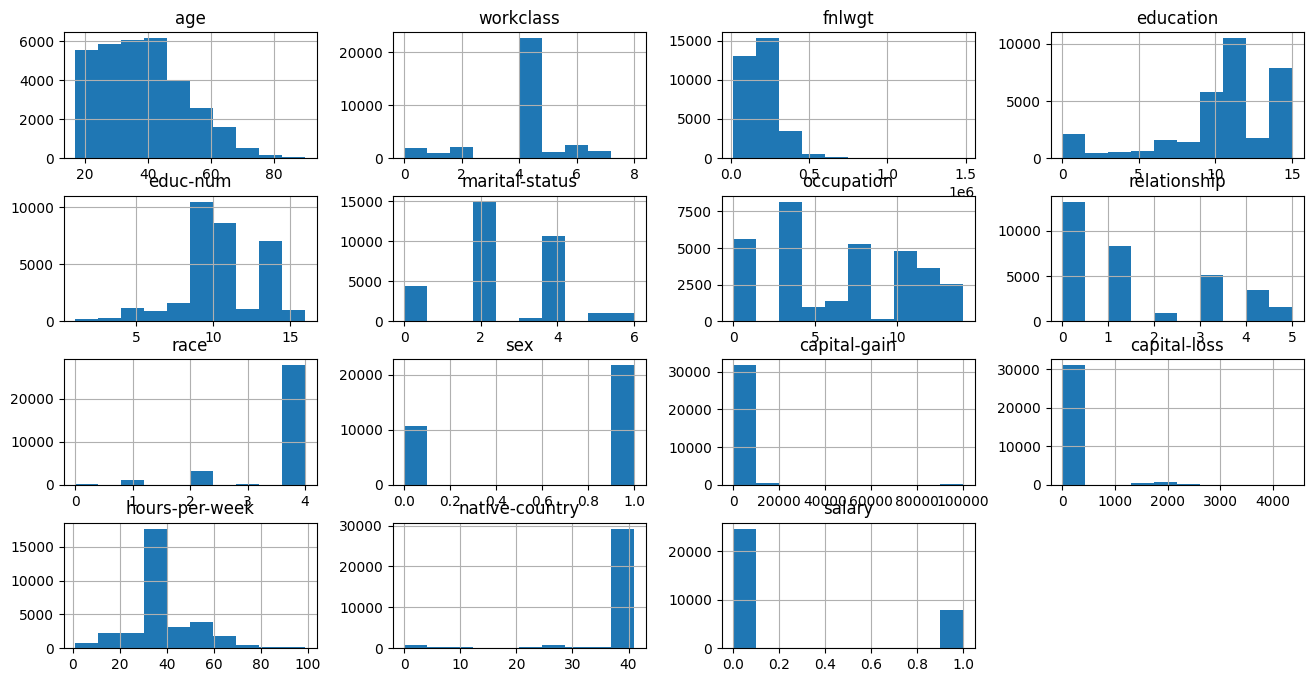

In [ ]:
encoded_data.hist(figsize=(16, 8))

## Seaborn

In [ ]:
import seaborn as sns

Теперь давайте перейдем к библиотеке `seaborn`. Seaborn — это, по сути, более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# найдем численные колонки
df.select_dtypes(include=numerics).head()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week,salary
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


### `pairplot`

Познакомимся с первым таким "сложным" типом графиков pair plot (scatter plot matrix). Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки.

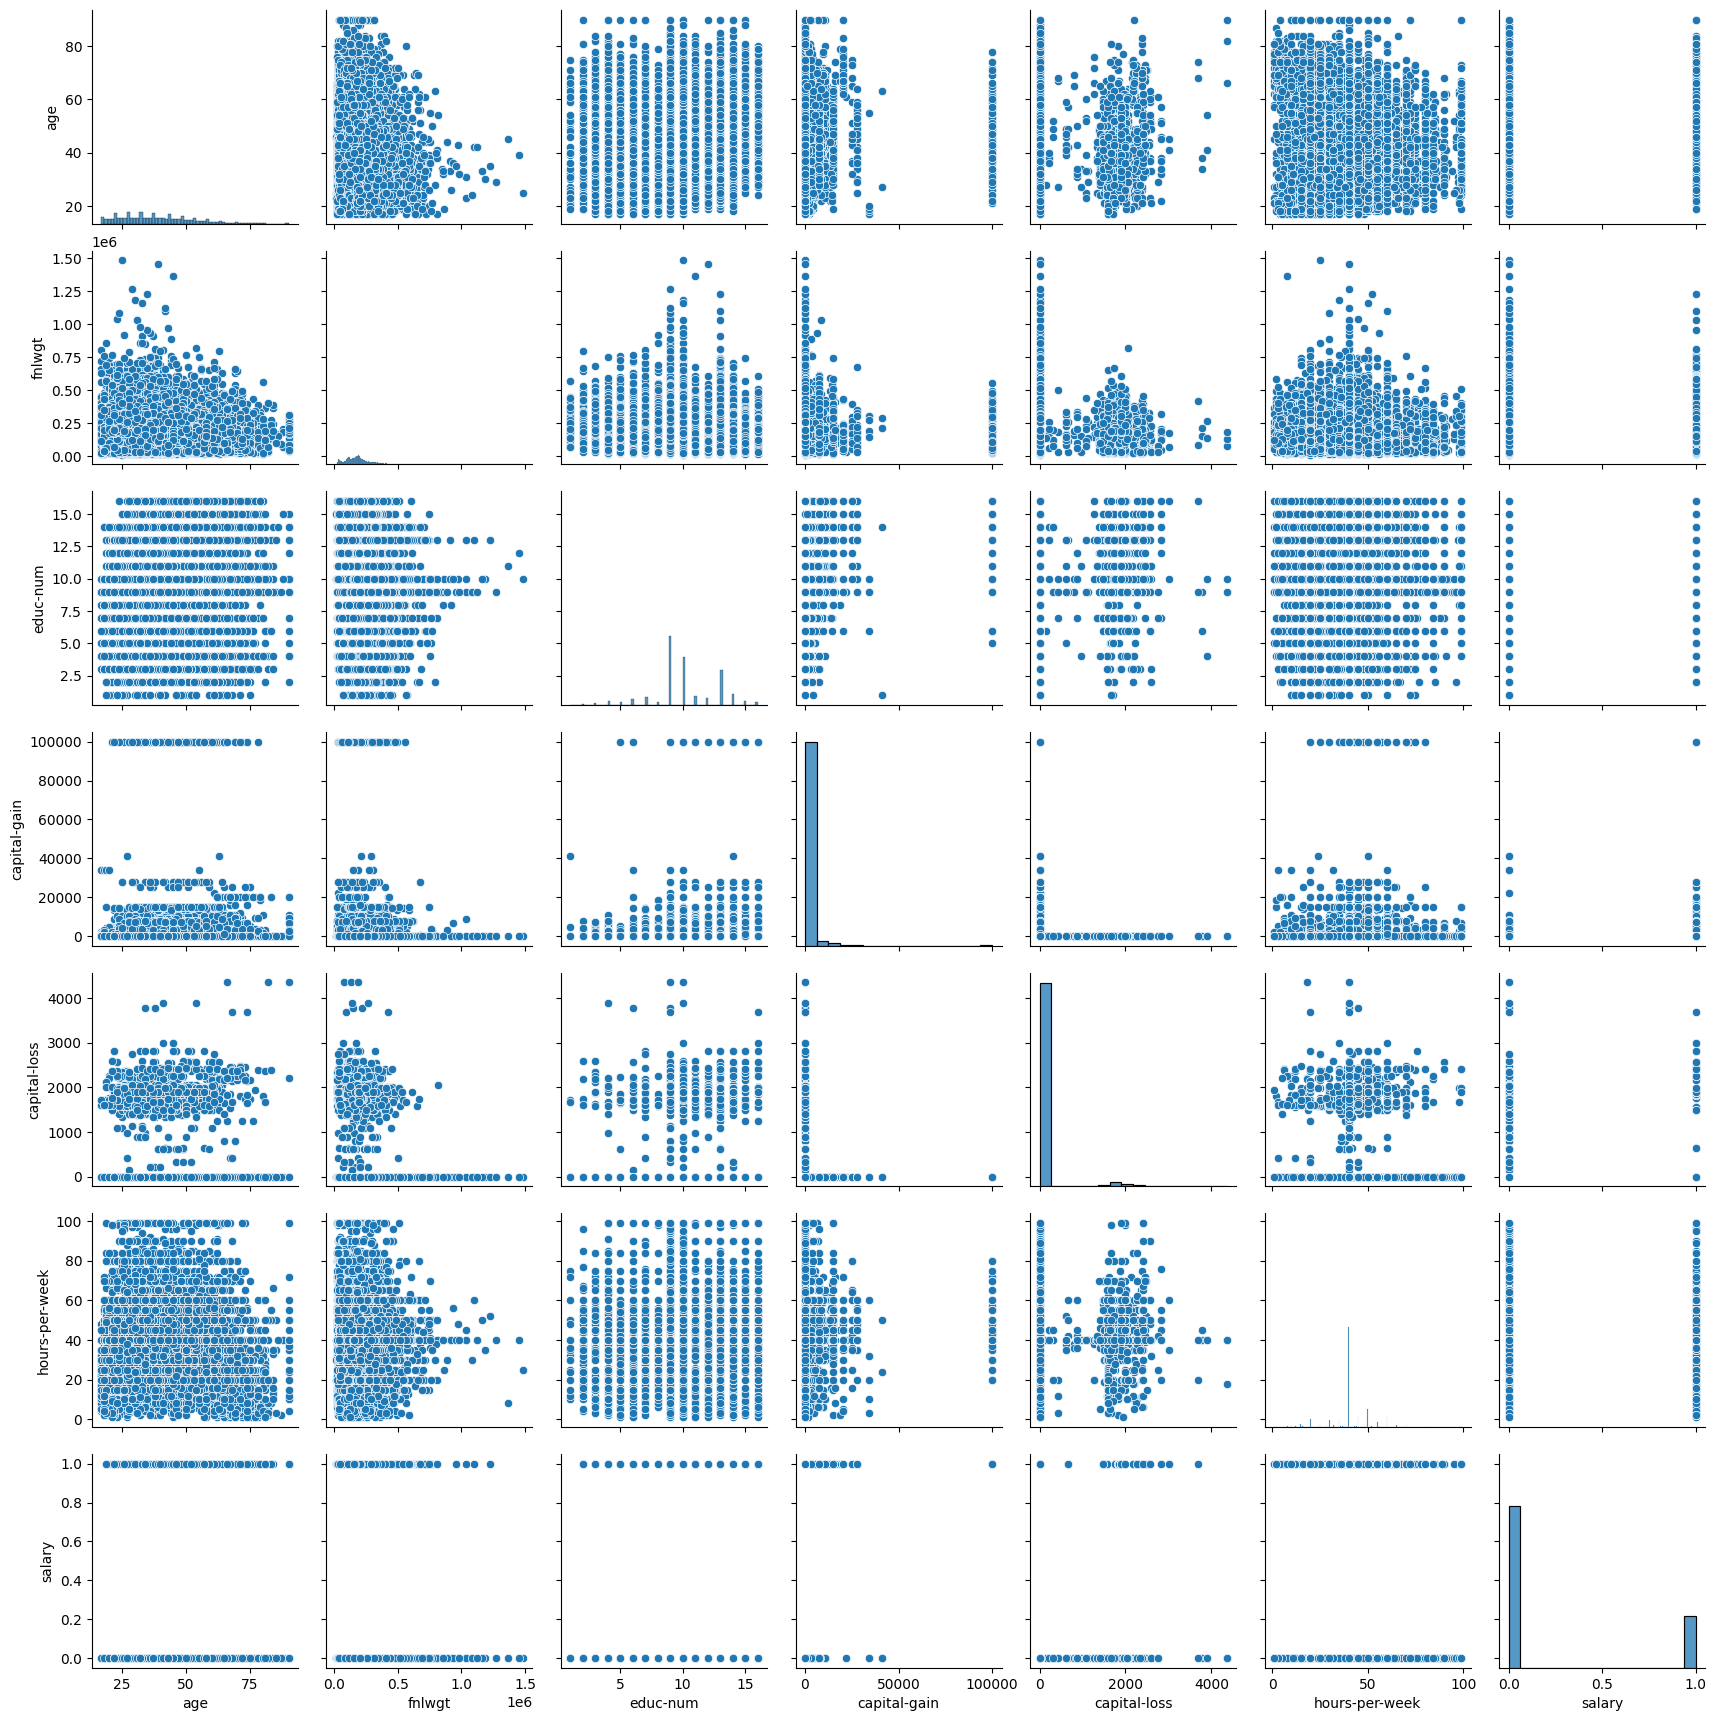

In [ ]:
sns_plot = sns.pairplot(df.select_dtypes(include=numerics))
# так можно сохранить график в png
sns_plot.savefig('pairplot.png')

Как можно видеть, на диагонали матрицы графиков расположены гистограммы распределений признака. Остальные же графики — это обычные scatter plots для соответствующих пар признаков.

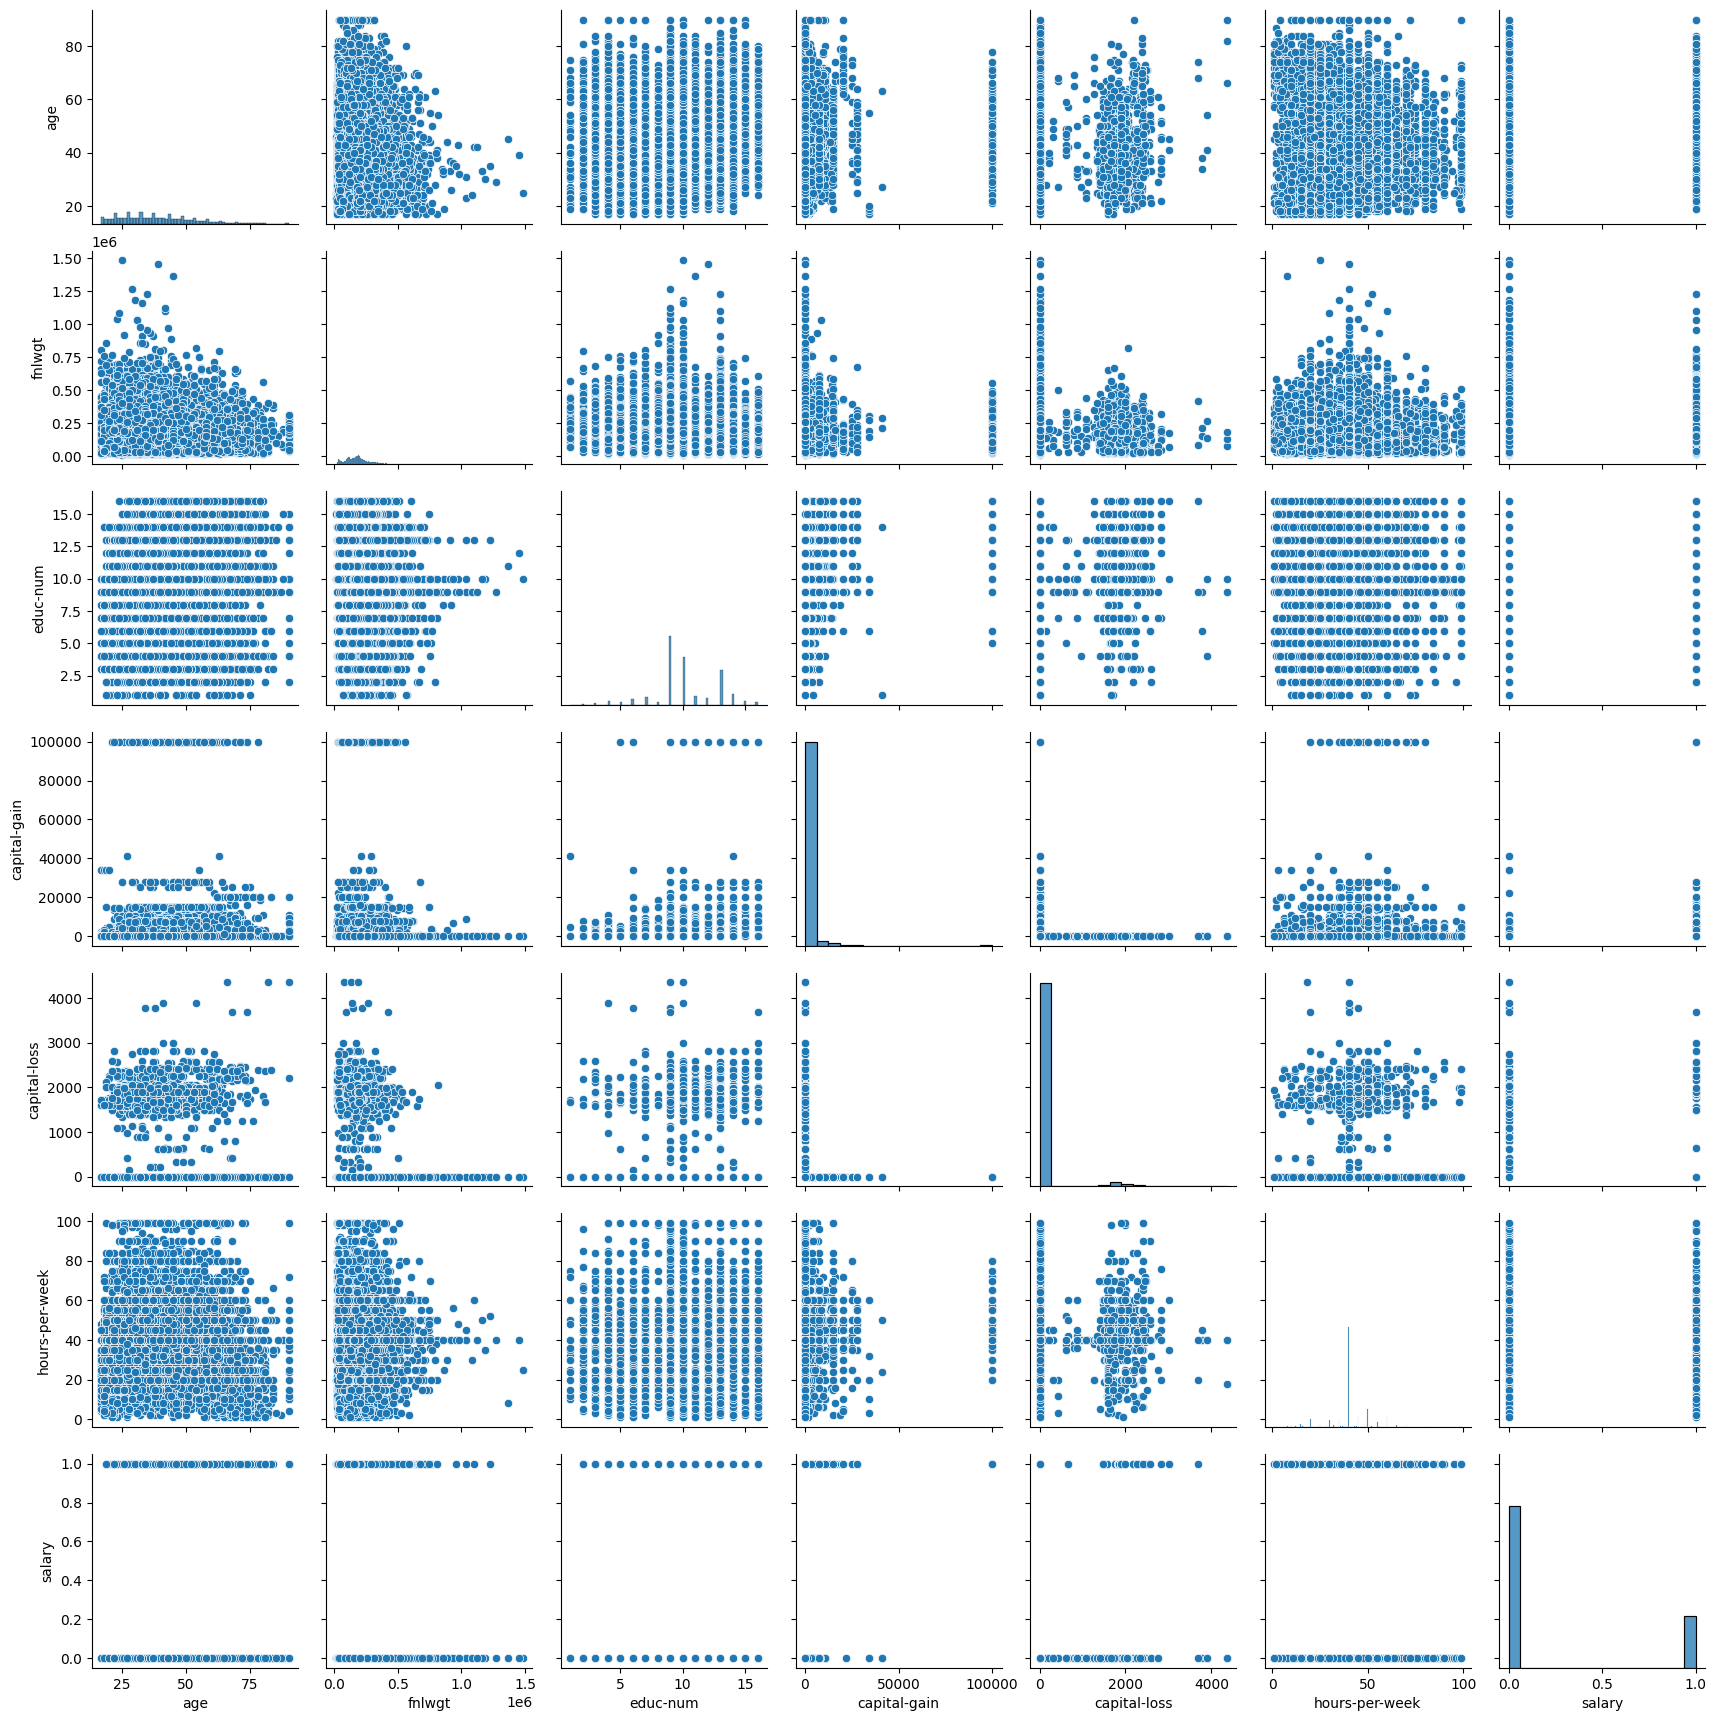

In [ ]:
sns.pairplot(df.select_dtypes(include=numerics))

### `displot`

С помощью seaborn можно построить и распределение dist plot. Для примера посмотрим на распределение:

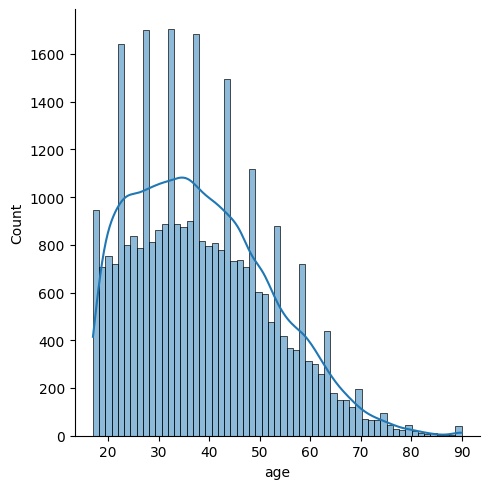

In [ ]:
sns.displot(df['age'], kde=True)

### `jointplot`

Для того, чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и `jointplot` — это гибрид `scatter plot` и `histogram`. Посмотрим на то, как связаны между собой возраст и зарплата:

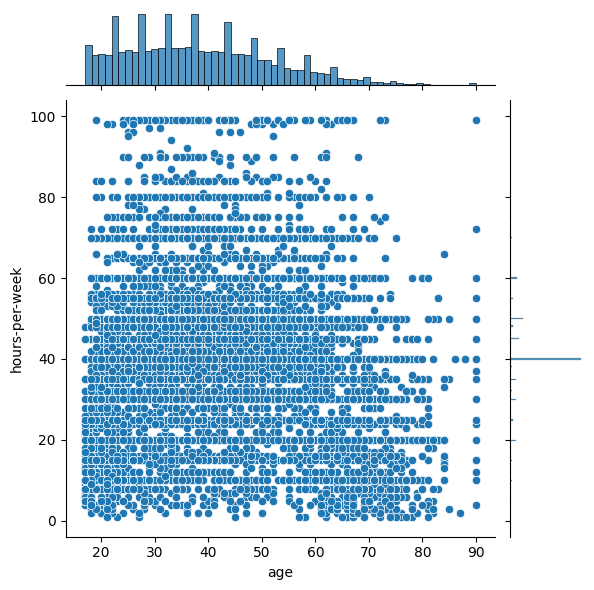

In [ ]:
sns.jointplot(data=df, x='age', y='hours-per-week')

### `box plot`

Еще один полезный тип графиков — это box plot. Давайте сравним распределения сфер работы по возрасту.



In [ ]:
# value counts покажет уникальные значения и их кол-во
# sort values отсортирует (по убыванию)
# index покажет названия
# values переведет в numpy массив
data = df['workclass'].value_counts().sort_values(ascending = False).index.values
data

array([' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype=object)

<Axes: xlabel='age', ylabel='workclass'>

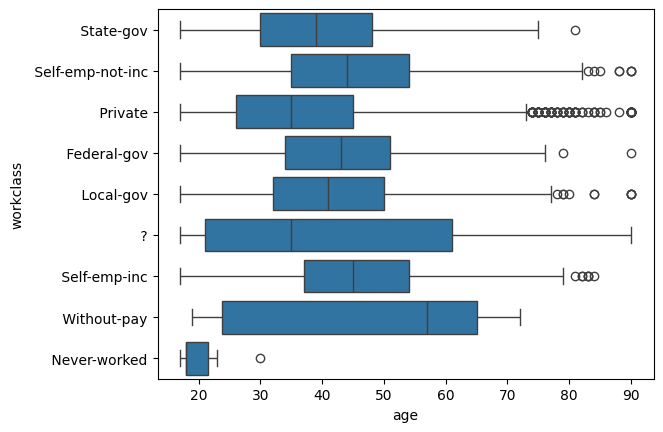

In [ ]:
sns.boxplot(y="workclass", x="age", data=df[df['workclass'].isin(data)], orient="h")

**Как же понимать box plot?**

Box plot состоит из:
- **коробки** - интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили. Черта внутри коробки обозначает медиану распределения
- **усиков** - весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR), где IQR = Q3 - Q1 — интерквартильный размах.
- **точек** - выбросы (outliers), те значения, которые не вписываются в промежуток значений, заданный усами графика

![](https://habrastorage.org/files/d0f/f53/8d5/d0ff538d59154901b18a98469de07fde.png)

### `heatmap`

И еще один тип графиков — это heat map. Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем количество людей в зависимости от рода деятельности и класса образования

<Axes: xlabel='education', ylabel='workclass'>

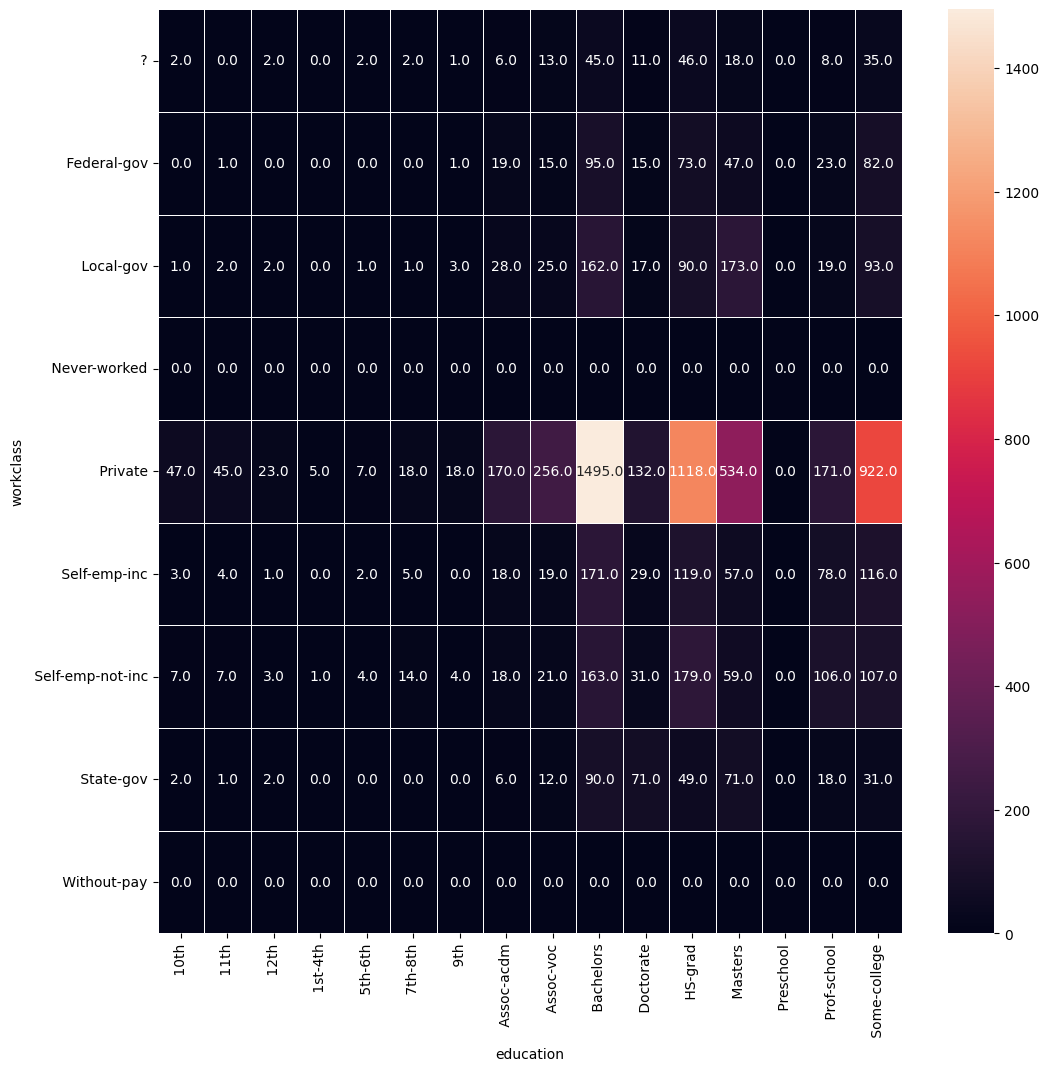

In [ ]:
table = df.pivot_table(
    index='workclass',
    columns='education',
    values='salary',
    aggfunc=sum
).fillna(0).applymap(float)

from matplotlib.pyplot import figure
figure(figsize=(12, 12))
sns.heatmap(table, annot=True, fmt=".1f", linewidths=.5)

### Матрица корреляций

По тепловой карте можно посмотреть на зависимости между признаками, а также на зависимости между целевой переменной и признаками.

Положительная зависимость означает прямую зависимость (чем больше одно, тем меньше другое), отрицательная означает обратное.

Значение близкое к нулю не обязательно означает отсутствие зависимости! Это лишь значит, что между признаками нет прямой (линейной) зависимости

<Axes: >

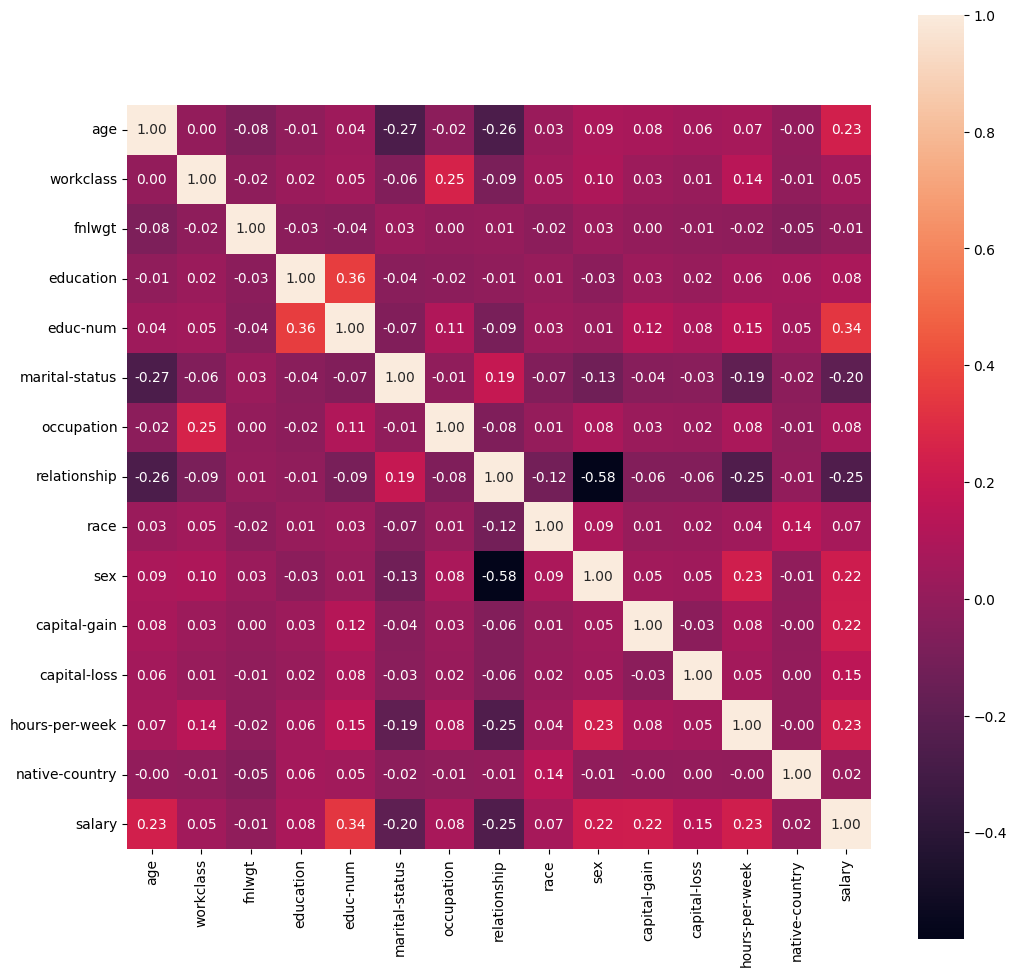

In [ ]:
figure(figsize=(12, 12))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), fmt=".2f", annot=True, square=True)

# k Nearest Neighbors (KNN)

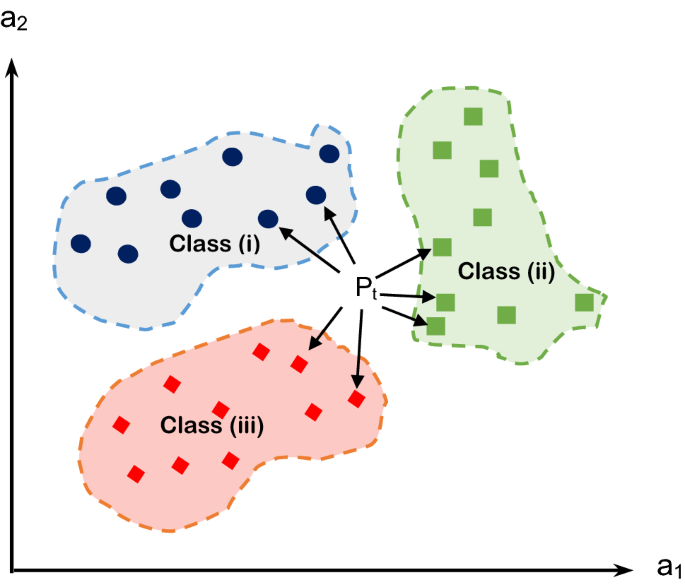

**K-nearest Neighbors (K ближайших соседей)** - один из простейших типов алгоритмов машинного обучения с учителем. Может быть использован как для классификации, так и для регрессии.





**Предположение** - объекты одного класса в пространстве признаков располагаются близко друг к другу по сравнению с объектами других классов.

Метрика расстояния - хорошее приближение меры схожести двух объектов.

**Алгоритм** (для каждого объекта тестовой выборки - $x$):
1. Считаем расстояния от $x$ до всех объектов обучающей выборки
2. Выбираем K объектов, расположенных максимально близко к $x$
3. На основе меток ближайших K объектов обучающей выборки получаем метку объекта $x$

Как получить метку $x$:
1. Простое голосование - выбираем ту метку, которая встречается чаще всего среди K ближайших соседей
2. Взвешанное голосование - у каждого из K соседей имеется вес $w_i$, обратно пропорциональный расстоянию до $x$, например, $w_i = 1/r_i$ или $w_i = 1/r_i^2$

**Замечание:** если при делении имеется вероятность в знаменателе получить 0, то добавьте в него малое число $ɛ$, например, $10^{-6}$, например,$w_i = 1/(r_i+ ɛ)$


**Вопрос** - а как в таком случае выполнять регрессию с помощью KNN?

## Метрики расстояния (как считать расстояние между двумя объектами?)

### Что такое метрика?

**Метрика** - неотрицательная функция двух аргументов $d(x, y) \geq 0$, удовлетворяющая условиям:

1. Если $d(x,y) = 0$, то $x=y$
2. $d(x,y)=d(y,x)$
3. $d(x, z) \leq d(x,y) + d(y,z)$ - неравенство треугольника

Популярные варианты метрик:
1. $L2$-метрика (евклидова метрика) - $d(x,y) = \sqrt{\sum_{i=1}^d (x_i - y_i)^2} $
2. $L1$-метрика (манхеттенская метрика) - $d(x,y) = \sum_{i=1}^d |x_i - y_i| $
3. $L_{\infty}$-метрика (расстояние Чебышева) - $d(x,y) = \max_{i=1}^d |x_i - y_i|$

![](https://miro.medium.com/max/1400/1*vAtQZbROuTdp36aQQ8cqBA.png)

**Что за число после L?**

Степень в метрике Минковского: $d(x,y) = \left(\sum_{i=1}^d |x_i - y_i|^p\right)^\frac{1}{p}$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/2D_unit_balls.svg/760px-2D_unit_balls.svg.png)

### Какую метрику использовать?

В целом, зависит от задачи - нет универсального ответа. Метрика - гиперпараметр алгоритма.

## Выбор $K$


В алгоритме KNN число $K$ - гиперпараметр, т.е. его должны подбирать мы, а не сама модель в процессее оптимизации.

Как и при работе с другими гиперпараметрами, подбор оптимального значения - на уровне искусства.

В общем случае выбор лучшего $K$ зависит от данных, большие значения $K$ снижают вклад шумов при классификации, но делают границы классов более размытыми. В случае бинарной классификации рекомендуется брать нечетные значения $K$.

## Подготовка данных

Будем предсказывать salary (> или < 50к в год - бинарная классификация)

In [ ]:
# создадим копию df
df_prc = df.copy()
df_prc['salary'] = df['salary'].apply((lambda x: x==' >50K')) # Будем предсказывать 1(True), если зарплата больше 50K, 0(False) иначе
df_prc.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False


Для того, чтоб можно было выбрать нужные колонки

In [ ]:
# числовые признаки
df._get_numeric_data().columns

Index(['age', 'fnlwgt', 'educ-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'salary'],
      dtype='object')

In [ ]:
# Найдём категориальные признаки
categ_cols = list(set(df.columns) - set(df._get_numeric_data().columns))
categ_cols

['occupation',
 'relationship',
 'education',
 'workclass',
 'race',
 'native-country',
 'marital-status',
 'sex']

In [ ]:
X = np.array(df_prc[df._get_numeric_data().drop(columns=['salary']).columns])
y = df['salary'].values

In [ ]:
X

array([[    39,  77516,     13,   2174,      0,     40],
       [    50,  83311,     13,      0,      0,     13],
       [    38, 215646,      9,      0,      0,     40],
       ...,
       [    58, 151910,      9,      0,      0,     40],
       [    22, 201490,      9,      0,      0,     20],
       [    52, 287927,      9,  15024,      0,     40]])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

## Обучение KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # функция разделения на train test
from sklearn.metrics import accuracy_score # доля верно угаданных ответов

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)  # инициализируем алгоритм

# разбиваем матрицу признаков и ответы на обучающую и тестовую выборки (80 / 20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# обучаем алгоритм на train
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# получаем прогнозы на основе признаков test
preds = knn.predict(X_test)

# сравниваем полученные прогнозы с реальными ответами test с помощью метрик качества
# количество верно угаданных / количество всех ответов (! не стоит использовать при дизбалансе классов !)
accuracy_score(y_test, preds)

0.7762753534111863

## Подбор гиперпараметров

Качество прогнозов алгоритмов зависит от их (гипер)параметров - например, число соседей на основе которого строится ответ.

Хотим найти такую комбинацию параметров, при которой качество (метрика качества) алгоритма на отложенной выборке будет максимизироваться.

В качестве классификатора используем kNN, признаки: число соседей (*n_neighbors*).

In [ ]:
# Будем использовать модель k ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

Для получения более точной оценки нашего алгоритма будем использовать [кросс-валидацию](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9A%D1%80%D0%BE%D1%81%D1%81-%D0%B2%D0%B0%D0%BB%D0%B8%D0%B4%D0%B0%D1%86%D0%B8%D1%8F)

Результаты тестов на каждом проходе (fold) усредним

![alt text](http://scott.fortmann-roe.com/docs/docs/MeasuringError/crossvalidation.png)

### Подбор параметра `n_neighbors` для `KNeighborsClassifier`



У алгоритма knn есть один гиперпараметр (то значение, которое мы выставляем руками) -- число соседей на основе которых алгоритм принимает решение.

В данной задаче мы будем использовать кросс-валидацию на 5 фолдах.

In [ ]:
# значение, которое будет принимать наше число соседей
np.array(np.linspace(1, 100, 10), dtype='int')

array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100])

In [ ]:
# подбор гиперпараметров по сетке с использованием Cross-Validation
from sklearn.model_selection import GridSearchCV

# Зададим сетку - среди каких значений выбирать наилучший параметр.
knn_grid = {
    'n_neighbors': np.array(np.linspace(1, 100, 10), dtype='int'), # перебираем по параметру <<n_neighbors>>, по сетке заданной np.linspace(2, 100, 10)
    #'metric': ['minkowski', 'euclidean']}
}


# Создаем объект кросс-валидации
gs = GridSearchCV(knn, knn_grid, cv=5, n_jobs=-1)

# Обучаем его
gs.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100])})

Посмотрим на результаты в виде таблицы:

In [ ]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.047597,0.007613,0.617395,0.016644,1,{'n_neighbors': 1},0.732483,0.733251,0.741202,0.731981,0.733671,0.734518,0.003393,10
1,0.045077,0.000751,0.641006,0.020258,12,{'n_neighbors': 12},0.795329,0.795790,0.798986,0.796988,0.796680,0.796755,0.001265,3
2,0.045262,0.001715,0.665134,0.013703,23,{'n_neighbors': 23},0.798095,0.797787,0.801752,0.796834,0.796834,0.798260,0.001817,1
3,0.045366,0.001732,0.726754,0.057595,34,{'n_neighbors': 34},0.797326,0.798095,0.800061,0.796834,0.794836,0.797431,0.001701,2
4,0.061385,0.015004,1.015242,0.209944,45,{'n_neighbors': 45},0.797019,0.796097,0.796988,0.796219,0.793607,0.795986,0.001249,4
5,0.095101,0.007057,1.288125,0.194193,56,{'n_neighbors': 56},0.795022,0.792563,0.794836,0.792838,0.791609,0.793374,0.001335,5
6,0.047775,0.009173,0.762178,0.024296,67,{'n_neighbors': 67},0.794561,0.792256,0.792838,0.793607,0.790994,0.792851,0.001208,6
7,0.043274,0.001323,0.784026,0.015911,78,{'n_neighbors': 78},0.791026,0.790104,0.790994,0.793300,0.788996,0.790884,0.001417,7
8,0.047543,0.006536,0.797886,0.022712,89,{'n_neighbors': 89},0.789490,0.788261,0.788535,0.791302,0.787613,0.789040,0.001282,8
9,0.048591,0.010445,0.794266,0.044748,100,{'n_neighbors': 100},0.787953,0.786724,0.786845,0.790072,0.786230,0.787565,0.001374,9


Построим график:

In [ ]:
# Функция отрисовки графиков
from matplotlib import pyplot as plt


def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

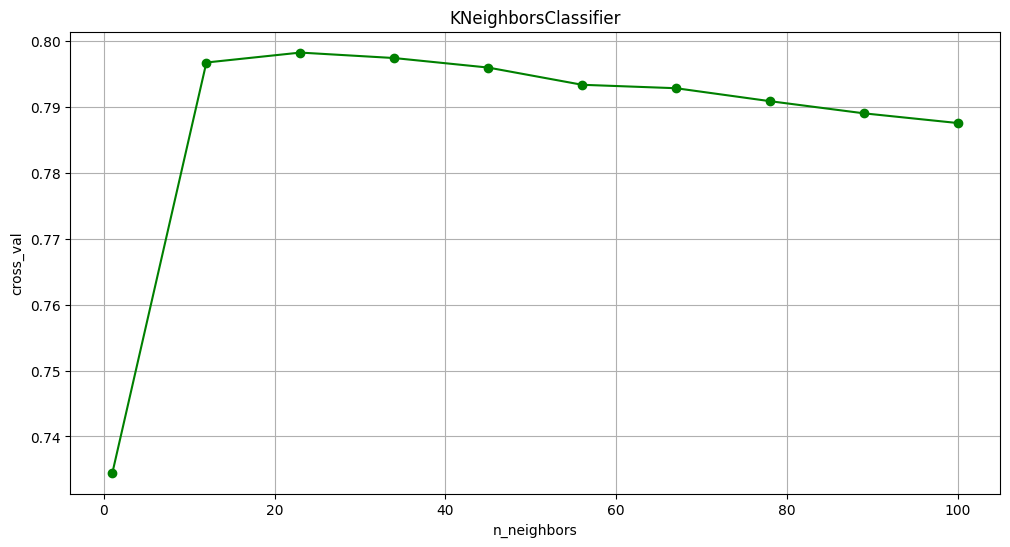

In [ ]:
# Строим график зависимости качества от числа соседей
# замечание: результаты обучения хранятся в атрибуте cv_results_ объекта gs

grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [ ]:
knn_grid = {'n_neighbors': np.array(np.linspace(40, 70, 11), dtype='int')}
gs = GridSearchCV(knn, knn_grid, cv=10)
gs.fit(X, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

({'n_neighbors': 40}, 0.7978301623521459)

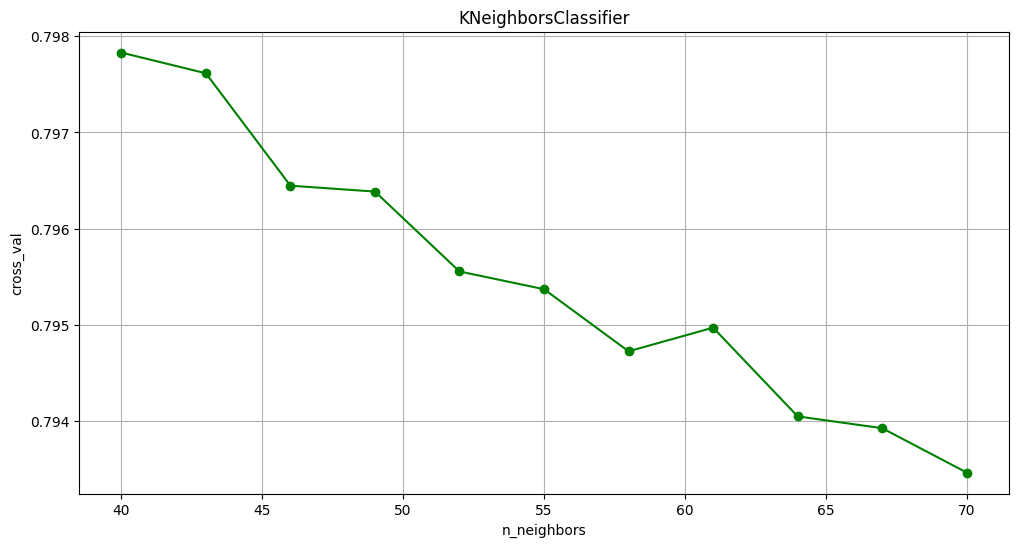

In [ ]:
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

## Нормирование данных

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

In [ ]:
X.T.std(axis=1)
# X.std()

array([1.36377739e+01, 1.05554849e+05, 2.57159349e+00, 7.38784389e+03,
       4.03095639e+02, 1.23466994e+01])

In [ ]:
X = (X - X.T.mean())/X.T.std()

In [ ]:
X.mean(axis=0)

array([-0.38408239,  1.90758604, -0.38442665, -0.37152383, -0.38349318,
       -0.38405999])

In [ ]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1.])

In [ ]:
X = (X - X.mean(axis=0))/X.std(axis=0)
X

array([[ 0.83696128, -1.0087032 ,  1.13481701, -0.14596869, -0.21674666,
        -2.22244997],
       [-0.04293421,  0.24500772, -0.42064566, -0.14596869, -0.21674666,
        -0.03566429],
       [ 1.05693515,  0.42571982, -1.198377  , -0.14596869, -0.21674666,
        -0.03566429],
       ...,
       [ 1.42355827, -0.35881227, -0.42064566, -0.14596869, -0.21674666,
        -0.03566429],
       [-1.21612819,  0.11089708, -0.42064566, -0.14596869, -0.21674666,
        -1.65550554],
       [ 0.98361053,  0.92978106, -0.42064566,  1.88761167, -0.21674666,
        -0.03566429]])

In [ ]:
from sklearn.preprocessing import scale
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

In [ ]:
X_scaled

array([[ 0.03038995, -1.06356884,  1.13477712,  0.14829174, -0.21674317,
        -0.03566374],
       [ 0.8369732 , -1.00866848,  1.13477712, -0.14597544, -0.21674317,
        -2.22248299],
       [-0.0429358 ,  0.24503992, -0.42067868, -0.14597544, -0.21674317,
        -0.03566374],
       ...,
       [ 1.42357919, -0.35877886, -0.42067868, -0.14597544, -0.21674317,
        -0.03566374],
       [-1.2161478 ,  0.11092955, -0.42067868, -0.14597544, -0.21674317,
        -1.65552985],
       [ 0.9836247 ,  0.92981187, -0.42067868,  1.88763548, -0.21674317,
        -0.03566374]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# минимакс шкалирование
scaler = MinMaxScaler()
# инициализируем на основе данных X
scaler.fit(X)
# трансформируем X (потом этим же объектом scaler трансформируем test)
scaler.transform(X)

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

In [ ]:
(X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

### GridSearchCV при нормированных признаках

зачем нормализовывать?
см. [пункт нормализация](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9)

{'n_neighbors': 67} 0.8222334033867089


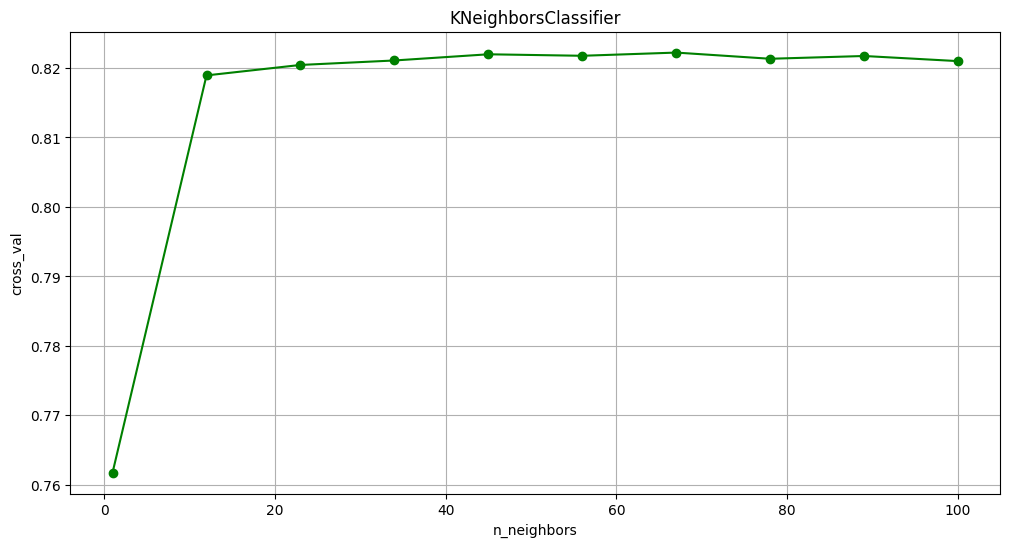

In [ ]:
# обучение идентично предыдущим, но в этот раз нормированные значения
grid = {'n_neighbors': np.array(np.linspace(1, 100, 10), dtype='int')}
gs = GridSearchCV(knn, grid, cv=10)
gs.fit(X_scaled, y)

print(gs.best_params_, gs.best_score_)

grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

{'n_neighbors': 55} 0.8222025186057962


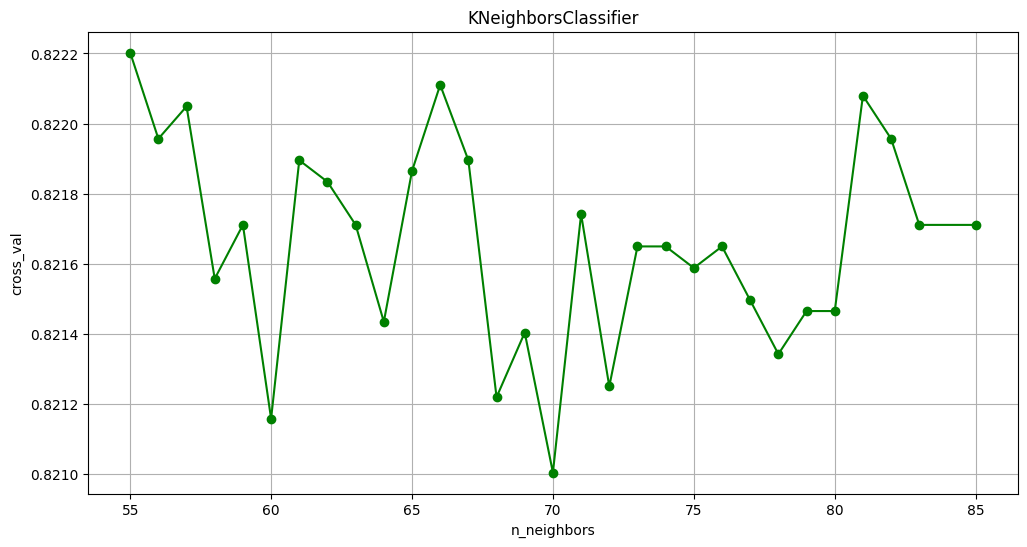

In [ ]:
# все тот же код, перебираем другие значения
grid = {'n_neighbors': np.array(np.linspace(55, 85, 30), dtype='int')}
gs = GridSearchCV(knn, grid, cv=5, n_jobs=-1)
gs.fit(X_scaled, y)
print(gs.best_params_, gs.best_score_)
grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

# Метрики для задачи классификации

![](https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm)

[ВАЖНО](https://habr.com/ru/company/ods/blog/328372/) прочесть

## Accuracy

Доля правильных ответов.

**Важно!  Не подходит для несбалансированных классов!**

Пускай имеем задачу кредитного скоринга:

- 100 людей, 10 из них ненадежные заемщики и выдача кредита им принесет убытки.
- Модель - константа, выдаем кредит всем.
- Accuracy будет 90/100 = 90%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

Сравним наш kNN с глупеньким классификатором:

- умный kNN
- глупый -- DummyClassifier (самый популярный класс)

In [ ]:
from sklearn.dummy import DummyClassifier

# импортируем и создаем knn классификатор по аналогии
knn = KNeighborsClassifier(n_neighbors=59)
# тренируем для knn и для dummy
clf_knn = knn.fit(X_train, y_train)
clf_mp = DummyClassifier().fit(X_train, y_train)

In [ ]:
# получаем от них предикты
y_knn = clf_knn.predict(X_test)
y_mp = clf_mp.predict(X_test)

In [ ]:
y_mp

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_knn

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# реальные ответы
y_test

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
from sklearn import metrics

print(f'knn\t=\t{metrics.accuracy_score(y_test, y_knn)}')
print(f'mp\t=\t{metrics.accuracy_score(y_test, y_mp)}')

knn	=	0.7902775190910785
mp	=	0.7593592847830136


### Confusion Matrix

Построим матрицу ошибок для обоих классификаторов:

[[8140   14]
 [2238  346]]


Text(0.5, 44.7222222222222, 'Predicted value')

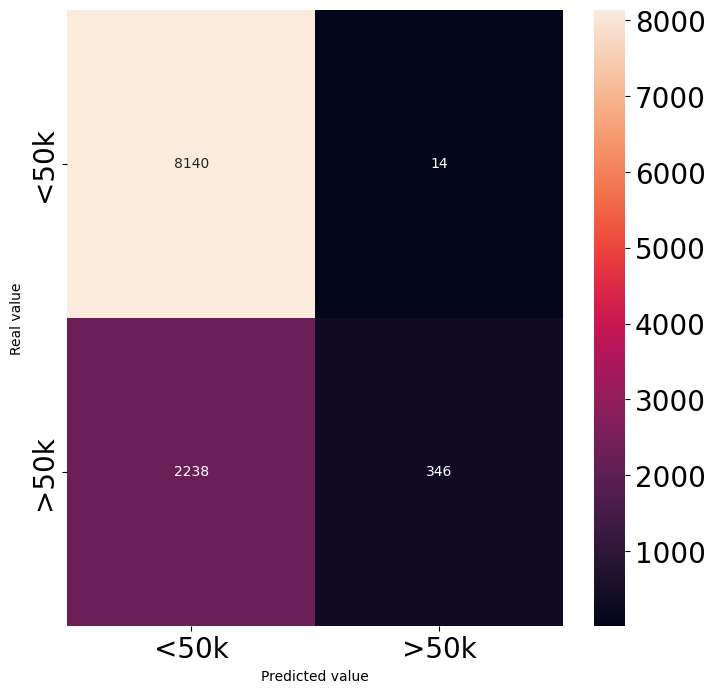

In [ ]:
import matplotlib

fig = plt.figure(figsize=(8, 8))
nn_mtx = metrics.confusion_matrix(y_test, y_knn)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
sns.heatmap(nn_mtx, annot=True, fmt="d",
            xticklabels=['<50k', '>50k'],
            yticklabels=['<50k', '>50k'])
plt.ylabel("Real value")
plt.xlabel("Predicted value")

[[8154    0]
 [2584    0]]


Text(0.5, 44.7222222222222, 'Predicted value')

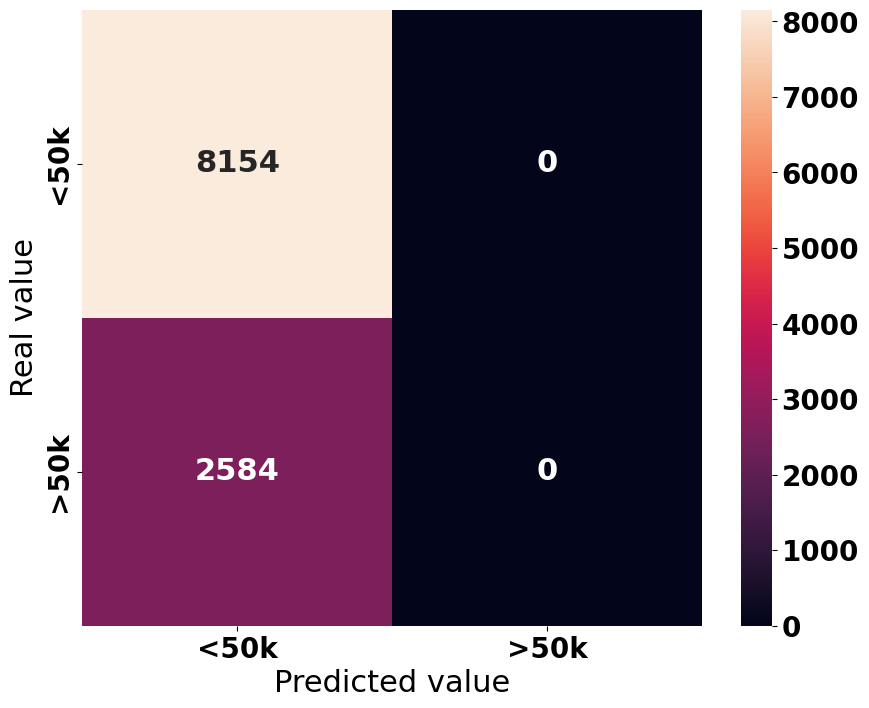

In [ ]:
mp_mtx = metrics.confusion_matrix(y_test, y_mp)
print(mp_mtx)
font = {'family' : 'Calibri', 'weight' : 'bold', 'size'   :22}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,8))
sns.heatmap(mp_mtx, annot=True, fmt="d",
            xticklabels=['<50k', '>50k'],
            yticklabels=['<50k', '>50k'])
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Поэтому просто увидев хорошее число радоваться рано!

## Precision

$$Precision = \frac{TP}{TP + FP}$$

Precision демонстрирует способность отличать этот класс от других классов

In [ ]:
print(f'knn\t=\t{metrics.precision_score(y_test, y_knn)}')
print(f'mp\t=\t{metrics.precision_score(y_test, y_mp)}')

knn	=	0.9611111111111111
mp	=	0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Recall

$$Recall = \frac{TP}{TP + FN}$$

Recall демонстрирует способность алгоритма обнаруживать данный класс вообще.

In [ ]:
print(f'knn\t=\t{metrics.recall_score(y_test, y_knn)}')
print(f'mp\t=\t{metrics.recall_score(y_test, y_mp)}')

knn	=	0.13390092879256965
mp	=	0.0


визуализация precision и recall

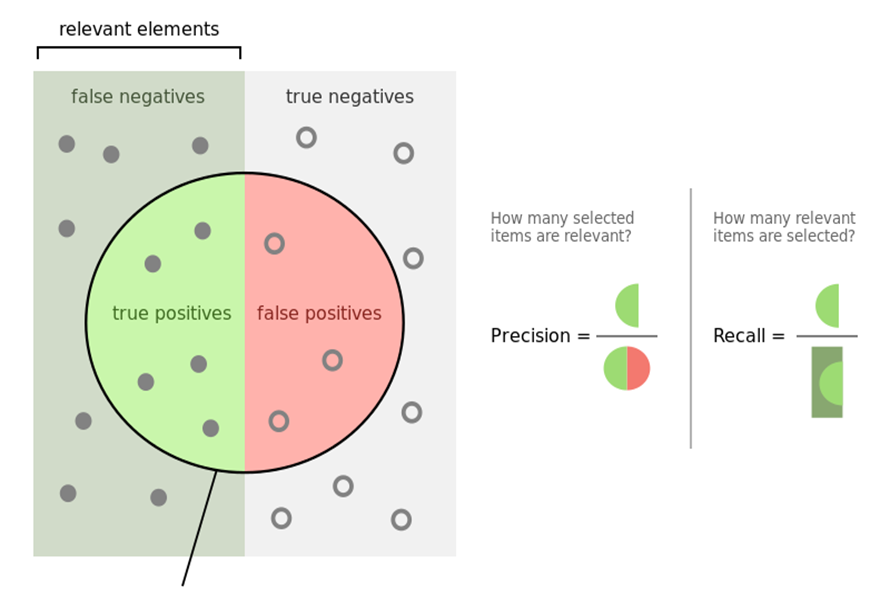

## F1

$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

F1-мера - попытка скрестить `Precision` и `Recall`.

Как взвесить Precision и Recall?
- Среднее арифметичиское плохо: (p=0.5, r=0.5) должно быть лучше чем (p=1, r=0),
- Лучше минимум, но при равной точности должен побеждать классфикатор с большей
- Гармоничиское среднее, сглаженный минимум

In [ ]:
print(f'knn\t=\t{metrics.f1_score(y_test, y_knn)}')
print(f'mp\t=\t{metrics.f1_score(y_test, y_mp)}')

knn	=	0.23505434782608695
mp	=	0.0


![](https://img.grepmed.com/uploads/8345/specificity-table-confusionmatrix-biostatistics-contingency-original.jpeg)

In [ ]:
print(metrics.classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      8154
           1       0.96      0.13      0.24      2584

    accuracy                           0.79     10738
   macro avg       0.87      0.57      0.56     10738
weighted avg       0.83      0.79      0.72     10738



# <span style="color:orange"> Multiclass Precision-Recall </span>

#### Загрузим датасет с тремя классами

In [ ]:
print(sns.get_dataset_names())
df_iris = sns.load_dataset("iris")
df_iris = df_iris.sample(n=150)
df_iris.head()

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,sepal_length,sepal_width,petal_length,petal_width,species
67,5.8,2.7,4.1,1.0,versicolor
79,5.7,2.6,3.5,1.0,versicolor
64,5.6,2.9,3.6,1.3,versicolor
28,5.2,3.4,1.4,0.2,setosa
53,5.5,2.3,4.0,1.3,versicolor


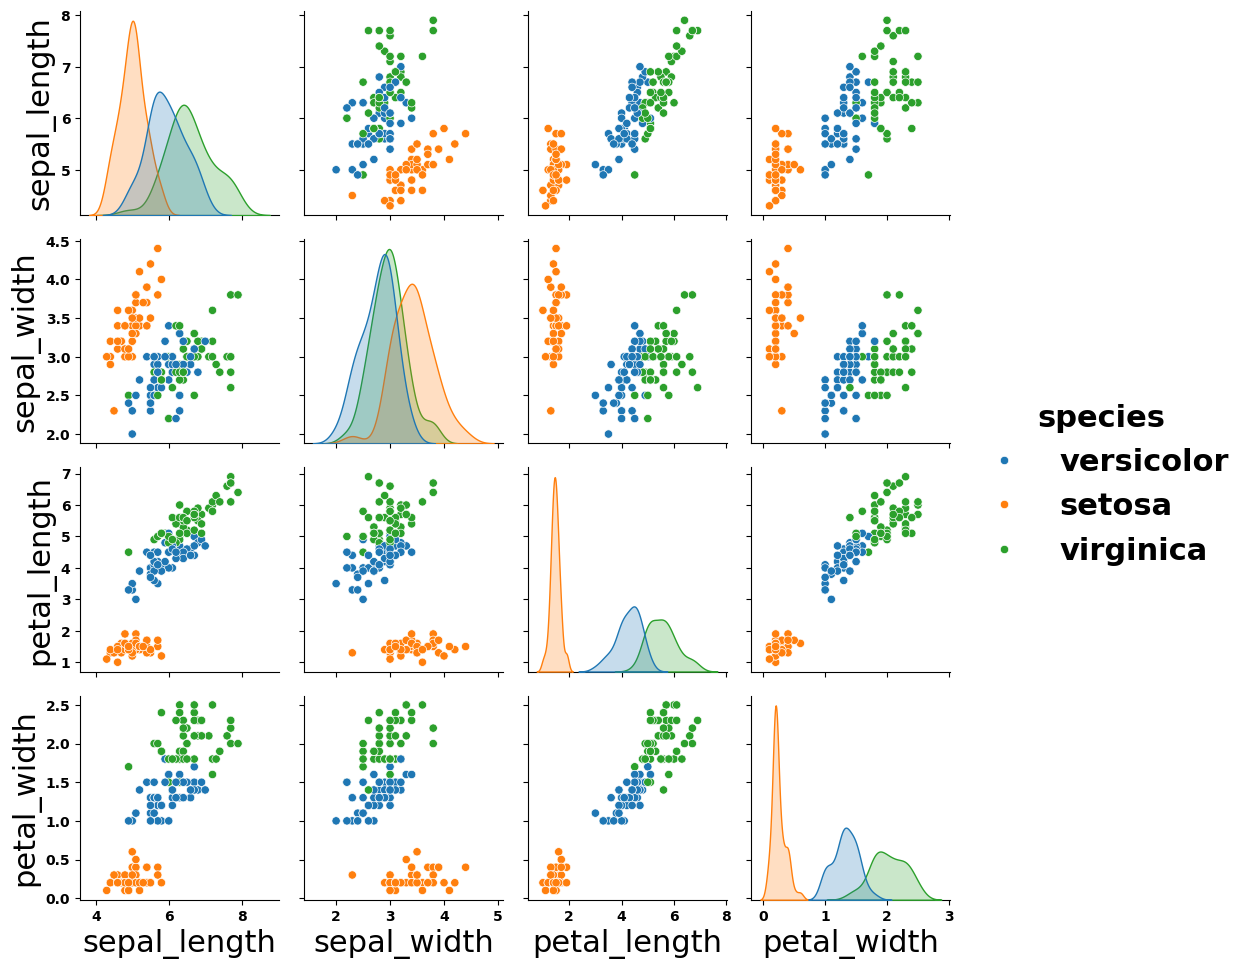

In [ ]:
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
sns.pairplot(df_iris, hue="species")

[Датасет ириса](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [ ]:
len(df_iris)

150

In [ ]:
# закодируем значения
df_iris, encoders = number_encode_features(df_iris)
# выбросим колонку, которую будем предсказывать
iris_X, iris_y = df_iris[df_iris.columns[:-1]].values, df_iris[df_iris.columns[-1]].values

# разделим на train test слайсингом
iris_X_train, iris_y_tain = iris_X[:100], iris_y[:100]
iris_X_test, iris_y_test = iris_X[50:], iris_y[50:]

In [ ]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
67,5.8,2.7,4.1,1.0,1
79,5.7,2.6,3.5,1.0,1
64,5.6,2.9,3.6,1.3,1
28,5.2,3.4,1.4,0.2,0
53,5.5,2.3,4.0,1.3,1


In [ ]:
# KNN и dummpy классификаторы на датасете
iris_clf_knn = KNeighborsClassifier().fit(iris_X_train, iris_y_tain)
iris_clf_mp = DummyClassifier().fit(iris_X_train, iris_y_tain)

In [ ]:
# предсказываем
iris_y_knn = iris_clf_knn.predict(iris_X_test)
iris_y_mp = iris_clf_mp.predict(iris_X_test)

Пусть выборка состоит из K классов. Рассмотрим K двухклассовых задач, каждая из которых заключается в отделении своего класса от остальных, то есть целевые значения для k-й задаче вычисляются как $y_{ik} = [yi = k]$. Для каждой из них можно вычислить различные характеристики (TP, FP, и т.д.) алгоритма $a_k(x) = [a(x) = k]$.

In [ ]:
mp_mtx

array([[34,  0,  0],
       [ 0, 31,  2],
       [ 0,  0, 33]])

In [ ]:
mp_mtx = metrics.confusion_matrix(iris_y_test, iris_y_knn)

fig = plt.figure(figsize=(10,8))
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
sns.heatmap(mp_mtx, annot=True, fmt="d",
            xticklabels=encoders["species"].classes_,
            yticklabels=encoders["species"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

KeyError: 'species'

<Figure size 1000x800 with 0 Axes>

**Macro-averaging** -- подсчет TP, FN, TN, FP для каждого класса, а после подсчет точности и полноты.

**Micro-averaging** -- подсчет  точности и полноты для каждого класса, а после подсчет их среденего.

In [ ]:
print('для kNN:')
print ('macro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='macro'), ', micro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='micro'))

#
print('\nдля dummy-classifier:')
iris_y_knn[iris_y_knn==1] = 0
print ('macro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='macro'), ', micro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='micro'))

для kNN:
macro =  0.5246098439375751 , micro =  0.63

для dummy-classifier:
macro =  0.5246098439375751 , micro =  0.63
